In [65]:
import pandas as pd

In [67]:
#Load the dataset
ratings_df=pd.read_csv('ratings.csv')

In [69]:
movies_df=pd.read_csv('movies.csv')

In [71]:
movie_rating_counts=ratings_df.groupby('movieId').size()

In [73]:
max_ratings=movie_rating_counts.max()

In [75]:
movie_with_max_ratings=movie_rating_counts[movie_rating_counts==max_ratings].index

In [77]:
print("Movie with max no. of rating",movie_with_max_ratings)

Movie with max no. of rating Index([356], dtype='int64', name='movieId')


In [79]:
#merge to movies dataset to get movie name
top_movies_df=movies_df[movies_df['movieId'].isin(movie_with_max_ratings)]
print(top_movies_df)

     movieId                title                    genres
314      356  Forrest Gump (1994)  Comedy|Drama|Romance|War


In [81]:
tags_df=pd.read_csv('tags.csv')

In [93]:
movieid=movies_df[movies_df['title']=="Matrix,The(1999)"]['movieId'].item()

ValueError: can only convert an array of size 1 to a Python scalar

In [23]:
#movie_id=movies_df[movies_df['title']=='Matrix,The(1999)']['movieId'].values[]

In [25]:
#tags=tags_df[tags_df['movieId']==movie_id]
#print(tags)

In [27]:
#Average rating
#t2_movie=movies_df[movies_df['title'].str.contains("Terminator 2:Judgment Day(1991)",case=False,na=False)]
#movie_id=t2_movie.iloc[0]['movieId']
#t2_rating=ratings_df[rating_df['movieId']==movie_id]
#avg_rating=t2_rating['rating'].mean()
#print(f"The avg user rating for 'Terminator 2:Judgment Day(1991)' is {avg_rating:.2f}")

In [29]:
merged_df=pd.merge(ratings_df,movies_df,on='movieId')


In [31]:
movie_title= "Fight Club (1999)"

In [33]:
filtered_df=merged_df[(merged_df['title']==movie_title)]

In [35]:
import matplotlib.pyplot as plt

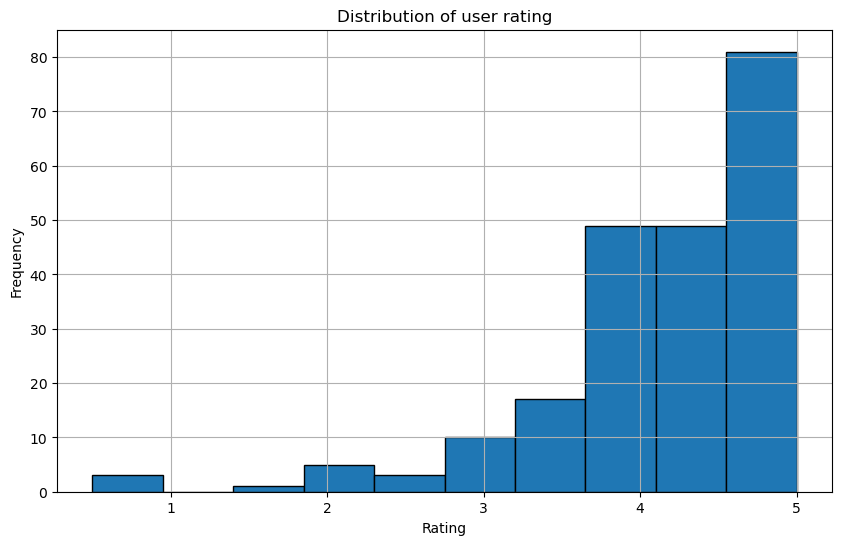

In [37]:
plt.figure(figsize=(10,6))
plt.hist(filtered_df['rating'],bins=10,edgecolor='black')
plt.title("Distribution of user rating")
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [39]:
from scipy.stats import skew

In [41]:

rating_data=filtered_df['rating']
data_skewness=skew(rating_data)
print(f"Skewness:{data_skewness}")

Skewness:-1.8474937360359363


In [43]:
result=merged_df.groupby('movieId').agg(count=('rating','size'),mean=('rating','mean')).reset_index()
print(result)

      movieId  count      mean
0           1    215  3.920930
1           2    110  3.431818
2           3     52  3.259615
3           4      7  2.357143
4           5     49  3.071429
...       ...    ...       ...
9719   193581      1  4.000000
9720   193583      1  3.500000
9721   193585      1  3.500000
9722   193587      1  3.500000
9723   193609      1  4.000000

[9724 rows x 3 columns]


In [45]:
final_result=pd.merge(result,movies_df[['movieId','title','genres']],on='movieId')
print(final_result)

      movieId  count      mean                                      title  \
0           1    215  3.920930                           Toy Story (1995)   
1           2    110  3.431818                             Jumanji (1995)   
2           3     52  3.259615                    Grumpier Old Men (1995)   
3           4      7  2.357143                   Waiting to Exhale (1995)   
4           5     49  3.071429         Father of the Bride Part II (1995)   
...       ...    ...       ...                                        ...   
9719   193581      1  4.000000  Black Butler: Book of the Atlantic (2017)   
9720   193583      1  3.500000               No Game No Life: Zero (2017)   
9721   193585      1  3.500000                               Flint (2017)   
9722   193587      1  3.500000        Bungo Stray Dogs: Dead Apple (2018)   
9723   193609      1  4.000000        Andrew Dice Clay: Dice Rules (1991)   

                                           genres  
0     Adventure|Animati

In [47]:
filtered_result=final_result[final_result['count']>50]
print(filtered_result)

      movieId  count      mean                             title  \
0           1    215  3.920930                  Toy Story (1995)   
1           2    110  3.431818                    Jumanji (1995)   
2           3     52  3.259615           Grumpier Old Men (1995)   
5           6    102  3.946078                       Heat (1995)   
6           7     54  3.185185                    Sabrina (1995)   
...       ...    ...       ...                               ...   
8287   106782     54  3.916667   Wolf of Wall Street, The (2013)   
8354   109374     52  3.778846  Grand Budapest Hotel, The (2014)   
8358   109487     73  3.993151               Interstellar (2014)   
8457   112852     59  4.050847    Guardians of the Galaxy (2014)   
8673   122904     54  3.833333                   Deadpool (2016)   

                                           genres  
0     Adventure|Animation|Children|Comedy|Fantasy  
1                      Adventure|Children|Fantasy  
2                          

In [49]:
most_popular_movie=filtered_result.loc[filtered_result['mean'].idxmax()]
print(f"Most popular movie'{most_popular_movie['title']}' with avg rating of {most_popular_movie['mean']:.2f}.")

Most popular movie'Shawshank Redemption, The (1994)' with avg rating of 4.43.


In [51]:
top_5_movies=final_result.sort_values(by='count',ascending=False).head(5)
print("Top 5 movies based on number of user ratings:")
for title in top_5_movies['title']:
    print(title)

Top 5 movies based on number of user ratings:
Forrest Gump (1994)
Shawshank Redemption, The (1994)
Pulp Fiction (1994)
Silence of the Lambs, The (1991)
Matrix, The (1999)


In [53]:
#sci_fi_movies=final_result[final_result['genres']=='Sci-Fi']
#sorted_scifi_movie=sci_fi_movies.sort_values(by='count',ascending=False)
#third_most_popular_scifi=sorted_scifi_movie.iloc[2]
#print(f"The 3rd most popular scifi movieis '{third_most_popular_scifi['title']}' with {third_most_popular_scifi['count']} ratings.")

In [55]:
import requests
from bs4 import BeautifulSoup

In [57]:
links_df=pd.read_csv('links.csv')

In [59]:
#merge result with links to include IMDB ids
final_result=pd.merge(result,links_df[['movieId','imdbId']],on='movieId')
filtered_result=final_result[final_result['count']>50]

In [63]:
def scrape_imdb_reviews(imdbId):
    url=f'https://www.imdb.com/title/{imdbId}/reviews'
    response=requests.get(url)
    soup=BeautifulSoup(response.text,'html.parser')
    reviews=[]
    for review in soup.find_all('div',class_='text show-more__control'):
        reviews.append(review.get_text(strip=True))
    return reviews

for index,row in filtered_result.iterrows():
    imdbid=row['imdbId']
    reviews=scrape_imdb_reviews(imdbid)
    print(f"Reviews for imdb ids {imdbid}:")
    for review in reviews:
        print(f"={review}")
    print()

Reviews for imdb ids 114709.0:

Reviews for imdb ids 113497.0:

Reviews for imdb ids 113228.0:

Reviews for imdb ids 113277.0:

Reviews for imdb ids 114319.0:

Reviews for imdb ids 113189.0:

Reviews for imdb ids 112346.0:

Reviews for imdb ids 112641.0:

Reviews for imdb ids 114388.0:

Reviews for imdb ids 112281.0:

Reviews for imdb ids 113161.0:

Reviews for imdb ids 113627.0:

Reviews for imdb ids 114746.0:

Reviews for imdb ids 112431.0:

Reviews for imdb ids 112818.0:

Reviews for imdb ids 112697.0:

Reviews for imdb ids 114369.0:

Reviews for imdb ids 114148.0:

Reviews for imdb ids 114814.0:

Reviews for imdb ids 113862.0:

Reviews for imdb ids 116367.0:

Reviews for imdb ids 115759.0:

Reviews for imdb ids 116483.0:

Reviews for imdb ids 112573.0:

Reviews for imdb ids 75314.0:

Reviews for imdb ids 115685.0:

Reviews for imdb ids 112442.0:

Reviews for imdb ids 112384.0:

Reviews for imdb ids 112462.0:

Reviews for imdb ids 112642.0:

Reviews for imdb ids 112715.0:

Reviews f